In [171]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
from datetime import timedelta

In [172]:
#folder = "3.14/origin/"
#folder = "3.14/hpcc/"
folder = "3.29_40G/"
starttime = 0
dt = 0.012

In [173]:
def read_out_tr(dir, file):
    col = ["events", "time", "from_node", "to_node", "pkt_type", "pkt_size", "flags", "fid", "src_addr", "dst_addr", "seq_num", "pkt_id"]
    df = pd.read_csv(dir+file, sep = ' ', header = None)
    df.columns = col
    return df

In [174]:
def get_receive_packets(df, src_addr):
    df_out = df.loc[df["events"].isin(["r"])]
    df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
    df_out = df_out.loc[df_out["dst_addr"].isin([5.0, 5.1, 5.2, 5.3])]
    df_out = df_out.loc[df_out["to_node"].isin([5])]
    df_out = df_out.loc[df_out["src_addr"].isin(src_addr)]
    return df_out

In [175]:
#raw_data = read_out_tr(folder, "HRCC.tr")
raw_data = read_out_tr(folder, "AFQ10.tr")
#raw_data = read_out_tr(folder, "AFQ100.tr")
#raw_data = read_out_tr(folder, "AFQ1000.tr")
#raw_data = read_out_tr(folder, "DropTail.tr")
#raw_data = read_out_tr(folder, "out.tr")

r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])
r_event_in_dst_1 = get_receive_packets(raw_data, [1.0, 1.1, 1.2, 1.3])
r_event_in_dst_2 = get_receive_packets(raw_data, [2.0, 2.1, 2.2, 2.3])
r_event_in_dst_3 = get_receive_packets(raw_data, [3.0, 3.1, 3.2, 3.3])

In [176]:
#raw_data = read_out_tr(folder, "HRCC_one_flow.tr")
#r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])

In [177]:
r_event_in_dst_1

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
20969,r,0.001507,4,5,tcp,40,-------,1,1.0,5.1,0,3485
21185,r,0.001521,4,5,tcp,1040,-------,1,1.0,5.1,1,3519
21209,r,0.001523,4,5,tcp,1040,-------,1,1.0,5.1,2,3520
21397,r,0.001535,4,5,tcp,1040,-------,1,1.0,5.1,3,3554
21421,r,0.001537,4,5,tcp,1040,-------,1,1.0,5.1,4,3555
21445,r,0.001539,4,5,tcp,1040,-------,1,1.0,5.1,5,3559
21469,r,0.001540,4,5,tcp,1040,-------,1,1.0,5.1,6,3560
21615,r,0.001549,4,5,tcp,1040,-------,1,1.0,5.1,7,3590
21641,r,0.001551,4,5,tcp,1040,-------,1,1.0,5.1,8,3591
21665,r,0.001553,4,5,tcp,1040,-------,1,1.0,5.1,9,3595


In [178]:
r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_1['ts'] = r_event_in_dst_1['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_2['ts'] = r_event_in_dst_2['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_3['ts'] = r_event_in_dst_3['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [179]:
#r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [180]:
#r_event_in_dst_0[2660:3000]
#r_event_in_dst_0[1734:3000]
#r_event_in_dst_0[5213:6000]
#r_event_in_dst_1[1941:3000]
#r_event_in_dst_2[1038:3000]


In [181]:
r_event_in_dst_0[(r_event_in_dst_0['time'] >= 0.0075) & (r_event_in_dst_0['time'] <= 0.0090)]


,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id,ts
107615,r,0.007502,4,5,tcp,1040,-------,0,0.0,5.0,4320,17852,00:00:00.007502
107649,r,0.007504,4,5,tcp,1040,-------,0,0.0,5.0,4321,17858,00:00:00.007504
107681,r,0.007507,4,5,tcp,1040,-------,0,0.0,5.0,4322,17864,00:00:00.007507
107713,r,0.007509,4,5,tcp,1040,-------,0,0.0,5.0,4323,17870,00:00:00.007509
107745,r,0.007512,4,5,tcp,1040,-------,0,0.0,5.0,4324,17876,00:00:00.007512
107777,r,0.007514,4,5,tcp,1040,-------,0,0.0,5.0,4325,17882,00:00:00.007514
107809,r,0.007517,4,5,tcp,1040,-------,0,0.0,5.0,4326,17888,00:00:00.007517
107841,r,0.007519,4,5,tcp,1040,-------,0,0.0,5.0,4327,17894,00:00:00.007519
107873,r,0.007522,4,5,tcp,1040,-------,0,0.0,5.0,4328,17900,00:00:00.007522
107905,r,0.007524,4,5,tcp,1040,-------,0,0.0,5.0,4329,17906,00:00:00.007524


In [182]:
#pkt_size_series = pd.Series(r_event_in_dst_1['pkt_size'], index=r_event_in_dst['ts'])

In [183]:
# H       hourly frequency
# T, min  minutely frequency
# S       secondly frequency
# L, ms   milliseonds
# U, us   microseconds
# N       nanoseconds
microseconds = 12
microseconds2 = 30
microseconds3 = 45
microseconds4 = 60

shortTh_0 = r_event_in_dst_0[r_event_in_dst_0['time'] <= 0.0015][['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000
temp = r_event_in_dst_0[(r_event_in_dst_0['time'] >= 0.0015) & (r_event_in_dst_0['time'] <= 0.0030)][['ts', 'pkt_size']].resample(str(microseconds2) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds2 * 1e-6) / 1000 / 1000 / 1000
shortTh_0 = pd.concat([shortTh_0, temp])
temp = r_event_in_dst_0[(r_event_in_dst_0['time'] >= 0.0030) & (r_event_in_dst_0['time'] <= 0.0045)][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
shortTh_0 = pd.concat([shortTh_0, temp])
temp = r_event_in_dst_0[(r_event_in_dst_0['time'] >= 0.0045) & (r_event_in_dst_0['time'] <= 0.0060)][['ts', 'pkt_size']].resample(str(microseconds4) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds4 * 1e-6) / 1000 / 1000 / 1000
shortTh_0 = pd.concat([shortTh_0, temp])
temp = r_event_in_dst_0[(r_event_in_dst_0['time'] >= 0.0060) & (r_event_in_dst_0['time'] <= 0.0075)][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
shortTh_0 = pd.concat([shortTh_0, temp])
temp = r_event_in_dst_0[(r_event_in_dst_0['time'] >= 0.0075) & (r_event_in_dst_0['time'] <= 0.0090)][['ts', 'pkt_size']].resample(str(microseconds2) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds2 * 1e-6) / 1000 / 1000 / 1000
shortTh_0 = pd.concat([shortTh_0, temp])
temp = r_event_in_dst_0[r_event_in_dst_0['time'] >= 0.009][['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000
shortTh_0 = pd.concat([shortTh_0, temp])


#shortTh_1 = r_event_in_dst_1[0:878][['ts', 'pkt_size']].resample(str(microseconds2) + 'U', on='ts').sum()
#shortTh_1['throughtput'] = shortTh_1['pkt_size'] * 8 / (microseconds2 * 1e-6) / 1000 / 1000 / 1000
#temp = r_event_in_dst_1[878:1487][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
#temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
#shortTh_1 = pd.concat([shortTh_1, temp])
#temp = r_event_in_dst_1[1487:1941][['ts', 'pkt_size']].resample(str(microseconds4) + 'U', on='ts').sum()
#temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds4 * 1e-6) / 1000 / 1000 / 1000
#shortTh_1 = pd.concat([shortTh_1, temp])
#temp = r_event_in_dst_1[1941:2538][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
#temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
#shortTh_1 = pd.concat([shortTh_1, temp])
#temp = r_event_in_dst_1[2538:][['ts', 'pkt_size']].resample(str(microseconds2) + 'U', on='ts').sum()
#temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds2 * 1e-6) / 1000 / 1000 / 1000
#shortTh_1 = pd.concat([shortTh_1, temp])
shortTh_1 = r_event_in_dst_1[r_event_in_dst_1['time'] <= 0.0030][['ts', 'pkt_size']].resample(str(microseconds2) + 'U', on='ts').sum()
shortTh_1['throughtput'] = shortTh_1['pkt_size'] * 8 / (microseconds2 * 1e-6) / 1000 / 1000 / 1000
temp = r_event_in_dst_1[(r_event_in_dst_1['time'] >= 0.0030) & (r_event_in_dst_1['time'] <= 0.0045)][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
shortTh_1 = pd.concat([shortTh_1, temp])
temp = r_event_in_dst_1[(r_event_in_dst_1['time'] >= 0.0045) & (r_event_in_dst_1['time'] <= 0.006)][['ts', 'pkt_size']].resample(str(microseconds4) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds4 * 1e-6) / 1000 / 1000 / 1000
shortTh_1 = pd.concat([shortTh_1, temp])
temp = r_event_in_dst_1[(r_event_in_dst_1['time'] >= 0.006) & (r_event_in_dst_1['time'] <= 0.0075)][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
shortTh_1 = pd.concat([shortTh_1, temp])
temp = r_event_in_dst_1[r_event_in_dst_1['time'] >= 0.0075][['ts', 'pkt_size']].resample(str(microseconds2) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds2 * 1e-6) / 1000 / 1000 / 1000
shortTh_1 = pd.concat([shortTh_1, temp])





#shortTh_2 = r_event_in_dst_2[0:587][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
#shortTh_2['throughtput'] = shortTh_2['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
#temp = r_event_in_dst_2[587:1042][['ts', 'pkt_size']].resample(str(microseconds4) + 'U', on='ts').sum()
#temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds4 * 1e-6) / 1000 / 1000 / 1000
#shortTh_2 = pd.concat([shortTh_2, temp])
#temp = r_event_in_dst_2[1042:][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
#temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
#shortTh_2 = pd.concat([shortTh_2, temp])
shortTh_2 = r_event_in_dst_2[(r_event_in_dst_2['time'] >= 0.003) & (r_event_in_dst_2['time'] <= 0.0045)][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
shortTh_2['throughtput'] = shortTh_2['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
temp = r_event_in_dst_2[(r_event_in_dst_2['time'] >= 0.0045) & (r_event_in_dst_2['time'] <= 0.006)][['ts', 'pkt_size']].resample(str(microseconds4) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds4 * 1e-6) / 1000 / 1000 / 1000
shortTh_2 = pd.concat([shortTh_2, temp])
temp = r_event_in_dst_2[r_event_in_dst_2['time'] >= 0.006][['ts', 'pkt_size']].resample(str(microseconds3) + 'U', on='ts').sum()
temp['throughtput'] = temp['pkt_size'] * 8 / (microseconds3 * 1e-6) / 1000 / 1000 / 1000
shortTh_2 = pd.concat([shortTh_2, temp])



shortTh_3 = r_event_in_dst_3[['ts', 'pkt_size']].resample(str(microseconds4) + 'U', on='ts').sum()
shortTh_3['throughtput'] = shortTh_3['pkt_size'] * 8 / (microseconds4 * 1e-6) / 1000 / 1000 / 1000

shortTh_0.head()

,pkt_size,throughtput
ts,,
00:00:00.000016,40,0.026667
00:00:00.000028,2080,1.386667
00:00:00.000040,4160,2.773333
00:00:00.000052,8320,5.546667
00:00:00.000064,9360,6.240000


In [184]:
#microseconds = 12
#shortTh_0 = r_event_in_dst_0[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
# GB
#shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000

In [185]:
shortTh_1.head()

,pkt_size,throughtput
ts,,
00:00:00.001507,3160,0.842667
00:00:00.001537,13520,3.605333
00:00:00.001567,18720,4.992000
00:00:00.001597,18720,4.992000
00:00:00.001627,18720,4.992000


In [186]:
res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
res_0.index = res_0.index / timedelta(seconds=1)

res_1 = shortTh_1[['throughtput']].unstack()['throughtput'].T
res_1.index = res_1.index / timedelta(seconds=1)

res_2 = shortTh_2[['throughtput']].unstack()['throughtput'].T
res_2.index = res_2.index / timedelta(seconds=1)

res_3 = shortTh_3[['throughtput']].unstack()['throughtput'].T
res_3.index = res_3.index / timedelta(seconds=1)



In [187]:
#res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
#res_0.index = res_0.index / timedelta(seconds=1)
res_1

ts
0.001507    0.842667
0.001537    3.605333
0.001567    4.992000
0.001597    4.992000
0.001627    4.992000
0.001657    4.992000
0.001687    4.992000
0.001717    4.992000
0.001747    5.269333
0.001777    4.992000
0.001807    4.992000
0.001837    4.992000
0.001867    4.992000
0.001897    4.992000
0.001927    4.992000
0.001957    4.992000
0.001987    4.992000
0.002017    4.992000
0.002047    4.992000
0.002077    4.992000
0.002107    4.992000
0.002137    4.992000
0.002167    4.992000
0.002197    4.992000
0.002227    4.992000
0.002257    4.992000
0.002287    4.992000
0.002317    4.992000
0.002347    4.992000
0.002377    4.992000
              ...   
0.008131    4.992000
0.008161    4.992000
0.008191    4.992000
0.008221    4.992000
0.008251    4.992000
0.008281    4.992000
0.008311    4.992000
0.008341    4.992000
0.008371    4.992000
0.008401    4.992000
0.008431    4.992000
0.008461    4.992000
0.008491    4.992000
0.008521    4.992000
0.008551    4.992000
0.008581    4.992000
0.008611  

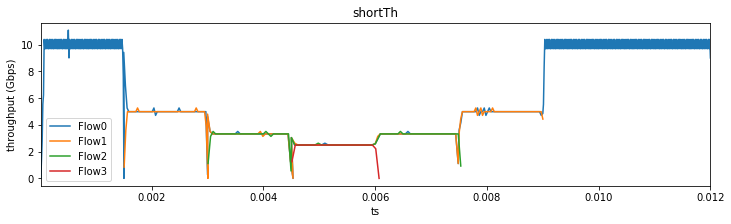

In [188]:
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')
res_2.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow2')
res_3.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow3')


plt.show()

KeyError: 0.0015

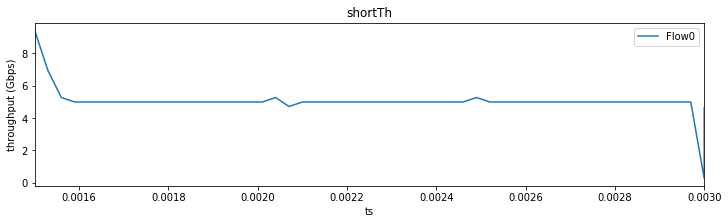

In [189]:
# 2 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.0015:0.003].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1[0.0015:0.003].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')


In [ ]:
# 3 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')
res_2[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow2')


In [ ]:
# 4 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')
res_2[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow2')
res_3[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow3')
